# Regression and Classification Assignment

This notebook uses the data discussed in regression_and_classification notebook.   You may want to review that if you
have trouble with the assignment.

## 1. The data

First we do some imports and load the data from the `sklearn` module.

In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np


data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']

## 2.  The questions

**Q1**

Don't take my word for it that subsets of the 4 Iris features always produce a worse classifier.
Try it out.

Change the selector array in the next cell and execute the code
in the cell to try out your own favorite subsets
of features.  No subset of 2 or even 3 features performs as well as using all 4.

For example, using this selector 
```
selector = np.array([True,True,False,True])
```

leaves out just  the third feature.  Here's your challenge: Find the best 2-feature
system (it performs almost as well as any 3-feature system), and the best
3-feature system.  Hint for the 2-feature problem, if you want to get there more
quickly.  Look at our plots of two-feature systems in the "Plotting Attributes" section of the regression_and_classification.ipynb notebook (Section 2).  Which one **looks**
like it gives the best separation?

In [3]:
#Use selected features
selector = np.array([True,True,False,False])
X = features[:,selector]
#X = features
Y = target
logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs',multi_class='auto')
logreg.fit(X, Y)

#Tesing on training set.  Not usually done.
predicted = logreg.predict(X)
accuracy_score(Y,predicted)

0.8333333333333334

Example using variant models.  Easy to collect info.

In [9]:
from sklearn import svm, datasets

#An SVM parameter, some others below.
C=1.0

# Cook up a tuple of mdoels to test (These are the models from the last
# plot in the simple regression NB)

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

# train them Notice this is not a list comprehension but looks like one.
models = (clf.fit(X, Y) for clf in models)

#Testing on training set.  Not usually done.
predicted = [model.predict(X) for model in models]
accuracy = [accuracy_score(Y,prediction) for prediction in predicted]
accuracy

[0.9666666666666667,
 0.9266666666666666,
 0.9666666666666667,
 0.9533333333333334]

**Q2**

In the regression_and_classification notebook, 
we implemented a function called `is_non_red` that is supposed to distinguish 
class 0 from classes 1 and 2.  Here is the definition and an example of using it
on a row of the Iris dataset.

In [4]:
def is_non_red (P):
    """
    P is a data point, all 4 attributes.
    
    Return True if P is in positive class.
    """
    return (P[2] - .9*P[0] + 2) > 0

P = features[-90]
print('P is in positive class: {0}'.format(is_non_red(P)))

P is in positive class: True


We call such a function a model (a model of `non-redness`). Write some code to evaluate this model's accuracy 
in predicting non redness.  Before calling the `accuracy_score` function, 
you will have to compute `predicted` using `is_non_red` to give you an array of predictions


To create a prediction array using `is_non_red`, apply it to every row
of `features`:

```
np.apply_along_axis(is_non_red, axis=1, arr= features)
```

You will also have to evaluate accuracy against a different standard.
You can't evaluate against the class array `target` defined above
because that has three classes and `is_non_red` essentially works with two. 
You have to start by creating a different
class array that only has two classes, matching the kind of results `is_non_red` produces.
The red class is 0, so you want `True` for every class 1 or 2 iris, and
`False` for every class 0 iris. For this, use a Boolean mask on `target`.

Be sure to say what your final score **means**.  Did you you do very well
or very badly?  Using scikit learn, compute a model you can compare this model to in order to know
whether you did very well or very badly. 

In [7]:
np.apply_along_axis(is_non_red, axis=1, arr= features)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**Q3** 

Using the `rock vs. mines` data set loaded in the next cell, draw a scatterplot of the points like the ones we did in Section 2 and 3 of this tutorial for the iris data. 
You will find the code in Section 3 of the regression_and_classification notebook will require the least modification.
This data set tries to distinguish two classes, rocks and mines, based on sonar readings.
Note, as the loading code indicates, this data has 60 features, which is a lot, so you should
just pick one pair of features out and plot them.  Crucially,
you **don't** need to plot all pairs (there are 1770 pairs), even though
with 60 features, you are unlikely to have much success using just two.

When modifying the code to draw the picture, bear in mind you really only need to
scatter the points.  You are not being asked to draw a separation line,
and you don't need to draw our point P, because it doesn't appear in this data.
You should try to give the points belonging to the two classes different colors
and shapes, as was done above.

In [14]:
import pandas as pd

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/undocumented/connectionist-bench/sonar/sonar.all-data")

#read rocks mines data
mine_df = pd.read_csv(target_url, header=None, prefix="V")
#mine_df = pd.read_csv(target_url, header=None)
mine_features = mine_df.values
(samp_sz, num_feats) = mine_features.shape
print('{0} exemplars with {1} features'.format(samp_sz, num_feats))
# The last column contains the class data.  Separate it from the others.
target = mine_features[:, 60]
# Everything else is a feature
mine_features = mine_features[:, :60]
(samp_sz, num_feats) = mine_features.shape

# Find the two classes we're trying to separate.
feat_set = list(set(target))
print('{0} classes: {1}'.format(len(feat_set), feat_set))

208 exemplars with 61 features
2 classes: ['R', 'M']


/var/folders/w9/bx4mylnd27g_kqqgn5hrn2x40000gr/T/ipykernel_67309/1236599120.py:7: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  mine_df = pd.read_csv(target_url, header=None, prefix="V")


In [13]:
markers,colors = 'ox','rg'
list(zip(range(3),markers,colors))

[(0, 'o', 'r'), (1, 'x', 'g')]

In [15]:
mine_features[target==0,0]

array([], dtype=object)

In [16]:
list(range(3))

[0, 1, 2]

**Q4**

Combining variables: Cheap non-linearity

The [Heidelberg stat-center](http://www.statlab.uni-heidelberg.de/data/iris/) reports a very nice result obtained by combining
the 2 petal features and the  2 sepal features by multiplication.  We end up with 2 **area** features, and a system that's almost as good as a 4-feature linear system,
at the cost of a little non-linearity (the multiplication). Here's the computation,
and the picture, both of which are very simple.  

Notice what the picture is telling us:  Petal area alone
is enough to almost perfectly perform the discrimination.  And the insight can easily be made visual.

Text(0, 0.5, 'petal area')

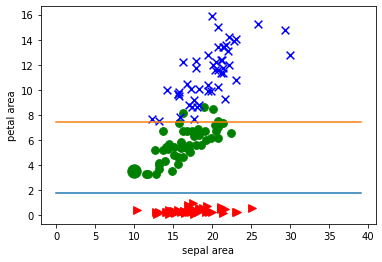

In [11]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib import pyplot as plt

data = load_iris()
features = data['data']
feature_names = data['feature_names']
target = data['target']
sepal_area = features[:,0] * features[:,1]
petal_area = features[:,2] * features[:,3]

for t,marker,c in zip(list(range(3)),">ox","rgb"):
    plt.scatter(sepal_area[target == t], petal_area[target == t], marker=marker, c=c,s=60) 

# Let's draw our point P with extra special attention getting large SIZE.
p_sepal_area,p_petal_area,p_target  = sepal_area[-90],petal_area[-90],target[-90]
marker,clr = ">ox"[p_target], "rgb"[p_target]
plt.scatter(p_sepal_area,p_petal_area,marker=marker,c=clr,s=180)

# Let;s draw some linear separators, horizontal lines in this case
plt.plot(np.arange(0.,40.),np.array([1.8]*40))
plt.plot(np.arange(0.,40.),np.array([7.4]*40))
plt.axis('tight')
plt.xlabel('sepal area')
plt.ylabel('petal area')

**Q4: Part A** 

Validate what the picture is telling you by training and evaluating a `linear_model.LogisticRegression` 
classifier that uses **only** the petal area feature.  

You can define values for `petal_area` feature by evaluating the cell.  Your
answer should be a few lines of code.  The last line should print out the
accuracy score for your classifier.

**Q4: Part B** 

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses **both** the petal area feature and the sepal area feature.  
Guidelines as with the last problem.


**Q4 Part C**

Train and evaluate a `linear_model.LogisticRegression` 
classifier that uses both  area features **as well as** the original 4 features.
Does this do better than a classifier trained on the original 4 features?


**Q5 Paret D**

Another model

In [29]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(interaction_only=True)
newX = pf.fit_transform(X)

In [45]:
newX.shape

(150, 11)

In [31]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = load_iris(return_X_y=True)

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
                                random_state=0).fit(newX, y)
print(gpc.score(newX, y))
gpc.predict_proba(newX[:2,:])
#array([[0.8354..., 0.03228..., 0.1322...],
#       [0.7906..., 0.0652..., 0.1441...]])

0.9866666666666667


array([[0.8642827 , 0.02606094, 0.10965636],
       [0.80255308, 0.06036089, 0.13708603]])

In [32]:
pc = gpc.predict_proba(newX)
pc.max(axis=1).mean()

0.7478708957031095

In [28]:
pc = gpc.predict_proba(X)
pc.max(axis=1).mean()

0.7568465696129202

In [33]:
#y_predicted_fg = gpc.predict(X)
y_predicted_poly = gpc.predict(newX)

In [39]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall_poly = recall_score(y,y_predicted_poly,average="micro")
recall_fg = recall_score(y,y_predicted_fg,average="micro")

In [40]:
recall_poly

0.9866666666666667

In [41]:
recall_fg

0.9866666666666667

In [42]:
precision_poly = precision_score(y,y_predicted_poly,average="micro")
precision_fg = precision_score(y,y_predicted_fg,average="micro")